In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'dermatology_database_1.csv'
data = pd.read_csv(file_path)



In [3]:
data.replace('?', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

In [4]:
X = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
z_scores = np.abs((X - X.mean()) / X.std())
outliers = (z_scores > 3).any(axis=1)
X_clean = X[~outliers]
y_clean = y[~outliers]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [6]:
svm_model_clean = SVC()
svm_model_clean.fit(X_train_clean, y_train_clean)
svm_pred_clean = svm_model_clean.predict(X_test_clean)
svm_accuracy_clean = accuracy_score(y_test_clean, svm_pred_clean)

rf_model_clean = RandomForestClassifier(random_state=42)
rf_model_clean.fit(X_train_clean, y_train_clean)
rf_pred_clean = rf_model_clean.predict(X_test_clean)
rf_accuracy_clean = accuracy_score(y_test_clean, rf_pred_clean)

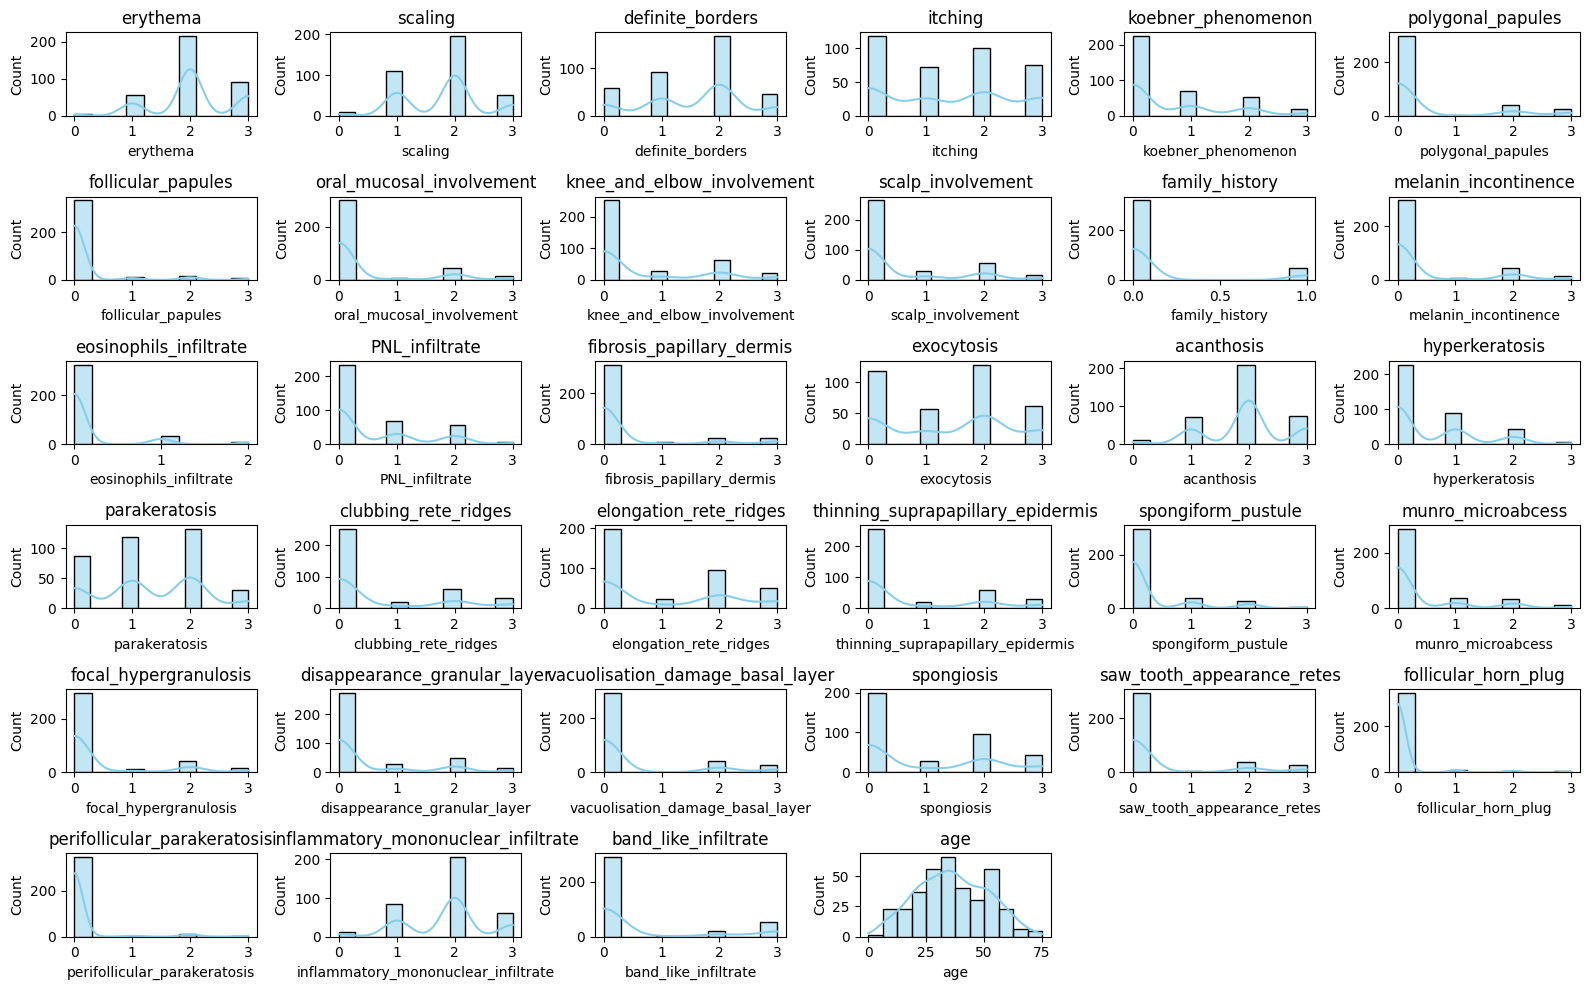

In [9]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(6, 6, i + 1)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

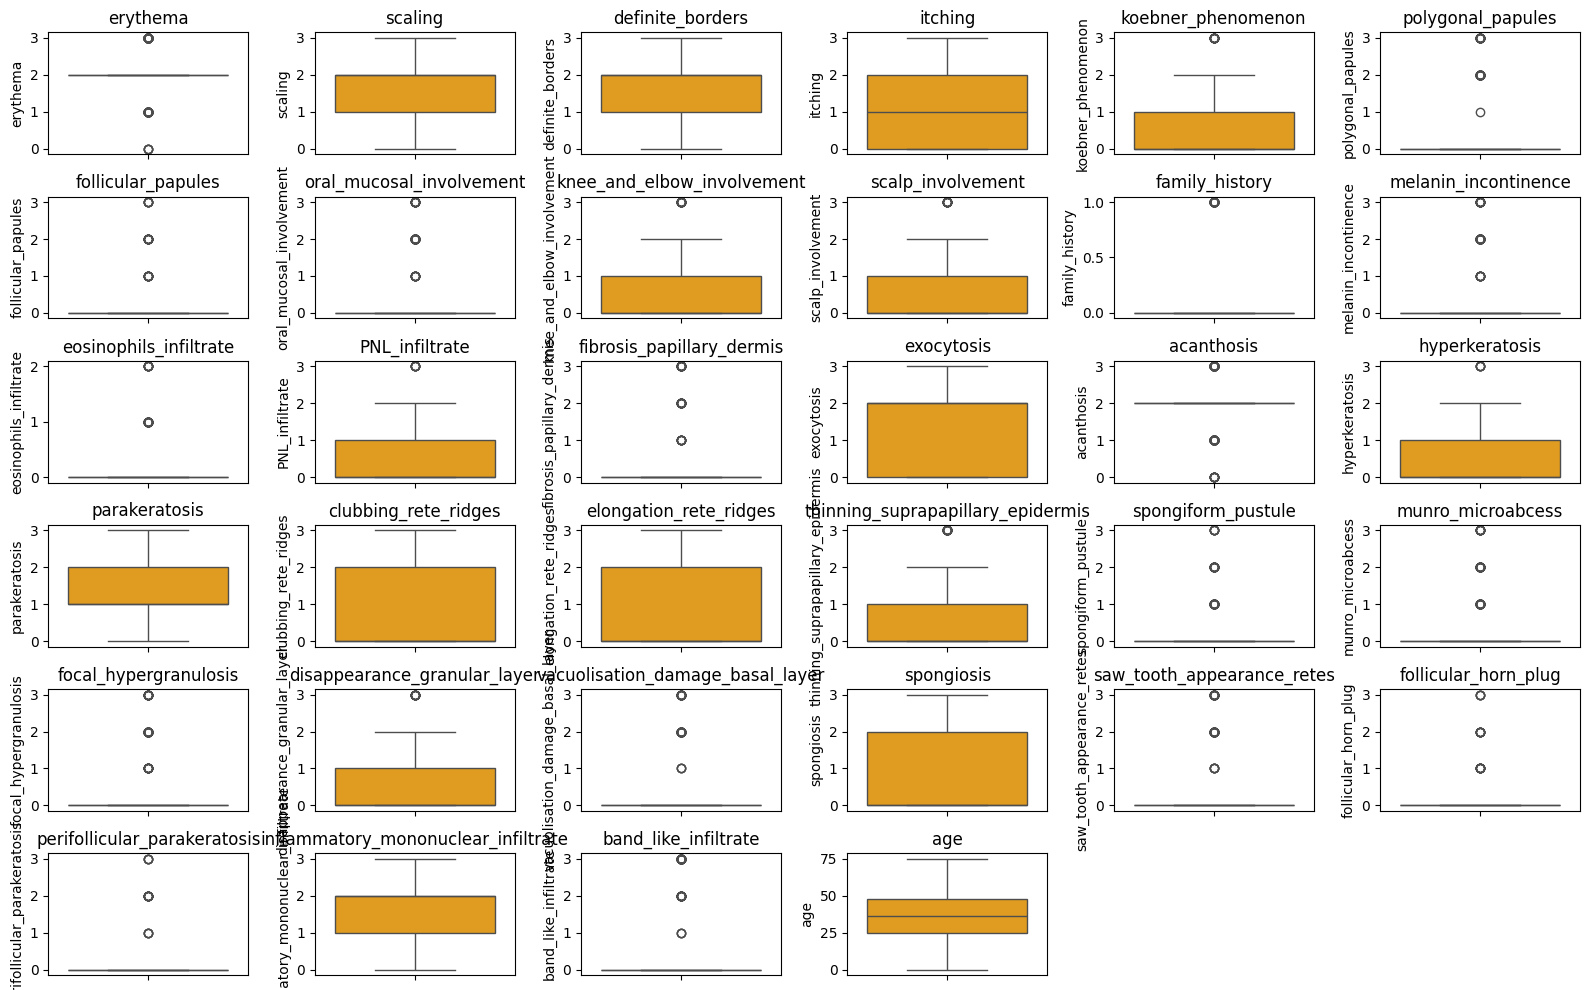

In [10]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=data[column], color='orange')
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:
{
    "SVM_accuracy_initial": svm_accuracy,
    "RF_accuracy_initial": rf_accuracy,
    "SVM_accuracy_cleaned": svm_accuracy_clean,
    "RF_accuracy_cleaned": rf_accuracy_clean,
}

{'SVM_accuracy_initial': 0.7297297297297297,
 'RF_accuracy_initial': 0.9864864864864865,
 'SVM_accuracy_cleaned': 0.6538461538461539,
 'RF_accuracy_cleaned': 0.9423076923076923}